In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import pickle
import os
import numpy as np
import seaborn as sns

In [84]:
df = pd.read_csv('../data/processed/bank_marketing_processed.csv')


<Axes: xlabel='age', ylabel='Count'>

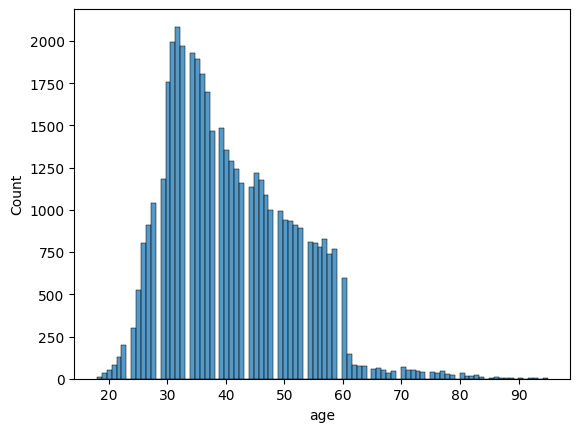

In [85]:
sns.histplot(data=df, x='age')

In [86]:
# Codificar variáveis categóricas
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(df[categorical_columns]).toarray()

# Concatenar as variáveis codificadas com as numéricas
numeric_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
X_numeric = df[numeric_columns].values
X = np.hstack((X_encoded, X_numeric))

# Separar o target
y = df['y'].values

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar as features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [87]:
script_dir = os.getcwd()

folder_path = os.path.abspath(os.path.join(script_dir, '..', 'data', 'models'))

if not os.path.exists(folder_path):
    os.makedirs(folder_path)
else:
    print(f"O diretório '{folder_path}' já existe.")

model_file_path = os.path.join(folder_path, 'logistic_regression.pkl')
encoder_file_path = os.path.join(folder_path, 'encoder.pkl')
scaler_file_path = os.path.join(folder_path, 'scaler.pkl')

with open(model_file_path, 'wb') as model_file:
    pickle.dump(model, model_file)

with open(encoder_file_path, 'wb') as encoder_file:
    pickle.dump(encoder, encoder_file)

with open(scaler_file_path, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

O diretório 'c:\Users\rodri\OneDrive\Documentos\ProjetoBackEnd\data\models' já existe.
